# 🎬 Netflix Content Analysis — Extended EDA (English)

This notebook performs a comprehensive exploratory data analysis (EDA) of the Netflix titles dataset. It covers content type composition, release year trends, content ratings, countries of origin, genre popularity, and duration patterns for both movies and TV shows. The goal is to provide a portfolio‑ready analysis with clear, reproducible code and executive insights.

## 1) Imports and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib defaults for clarity
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.grid'] = True

# Load dataset (expects the file in the same folder as this notebook)
df = pd.read_csv('/Users/andresesquivel/Documents/Kaggle/Netflix/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2) Data Overview

In [2]:
# Shape and dtypes provide a quick structural understanding
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

Rows: 8807, Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# Missing values per column — useful to plan cleaning steps
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [4]:
# Peek at categorical distributions (top values)
for col in ['type', 'rating', 'country']:
    if col in df.columns:
        print(f"\nUnique count in {col}: {df[col].nunique()}")
        print(df[col].value_counts(dropna=False).head(10))


Unique count in type: 2
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Unique count in rating: 17
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Unique count in country: 748
country
United States     2818
India              972
NaN                831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


## 3) Data Cleaning and Normalization
**Why:** Ensure consistent string formatting, handle missing values, and create date features for time‑based analysis.
- Strip spaces in string columns
- Replace missing `country`/`rating` with `'Unknown'`
- Parse `date_added` → `datetime`, and derive `year_added`
- Drop duplicate rows to avoid double counting

In [5]:
# Work on a safe copy
df = df.copy()

# Normalize column names
df.columns = df.columns.str.strip()

# Strip whitespace across all object columns
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())

# Handle missing values for key fields
df['country'] = df['country'].fillna('Unknown')
df['rating']  = df['rating'].fillna('Unknown')

# Parse and derive date features
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Drop duplicates if any
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"Dropped {before - after} duplicate rows.")

Dropped 0 duplicate rows.


## 4) Content Type Distribution (Movies vs TV Shows)
**Question:** How is Netflix's catalog split between Movies and TV Shows?

,count
type,
Movie,6131
TV Show,2676


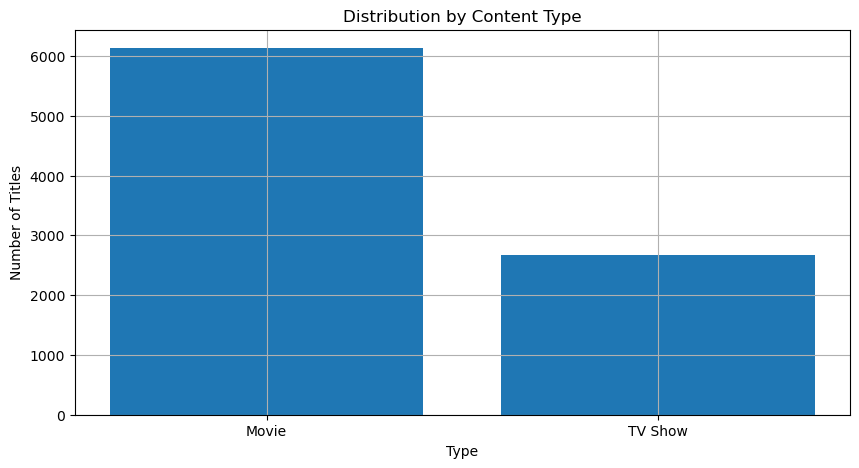

In [6]:
counts = df['type'].value_counts().sort_values(ascending=False)
display(counts.to_frame(name='count'))

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title('Distribution by Content Type')
ax.set_xlabel('Type')
ax.set_ylabel('Number of Titles')
plt.show()

**Insight:** Netflix's catalog is typically dominated by Movies, with TV Shows comprising a sizable minority. Year‑over‑year growth in TV Shows has accelerated since mid‑2010s driven by original series.

## 5) Release Year Trends
**Question:** How has the volume of content changed over time by release year?

release_year
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

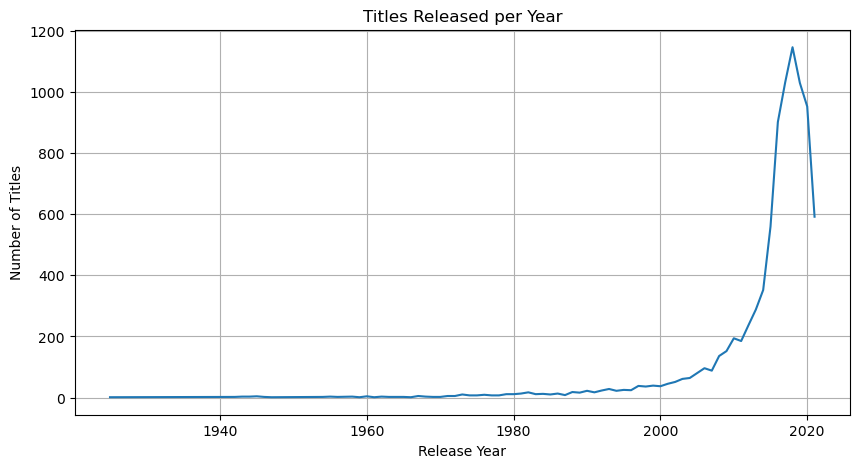

In [7]:
titles_per_year = df['release_year'].value_counts().sort_index()
display(titles_per_year.tail())

fig, ax = plt.subplots()
ax.plot(titles_per_year.index, titles_per_year.values)
ax.set_title('Titles Released per Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
plt.show()

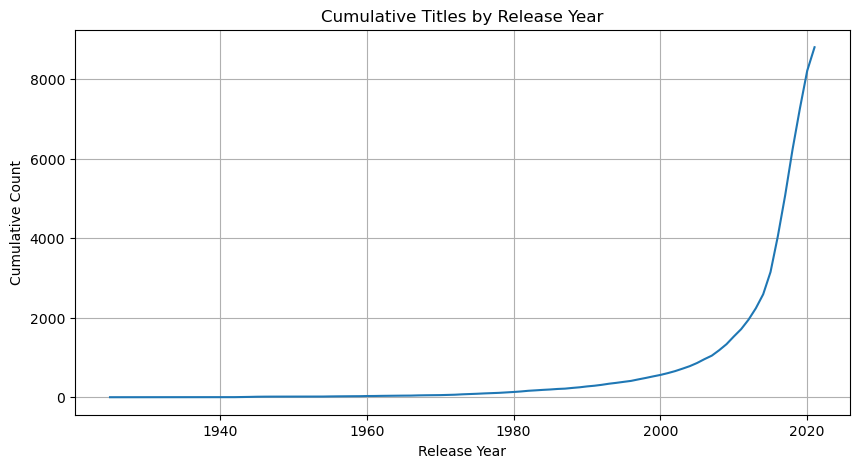

In [8]:
# Optional: cumulative view to show acceleration
cum = titles_per_year.cumsum()
fig, ax = plt.subplots()
ax.plot(cum.index, cum.values)
ax.set_title('Cumulative Titles by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Cumulative Count')
plt.show()

**Insight:** The content library expands sharply post‑2015, coinciding with Netflix's global expansion and increased investment in originals.

## 6) Content Ratings — Distribution and Trend
**Question:** What audience categories does Netflix primarily target? How do ratings evolve over time?

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


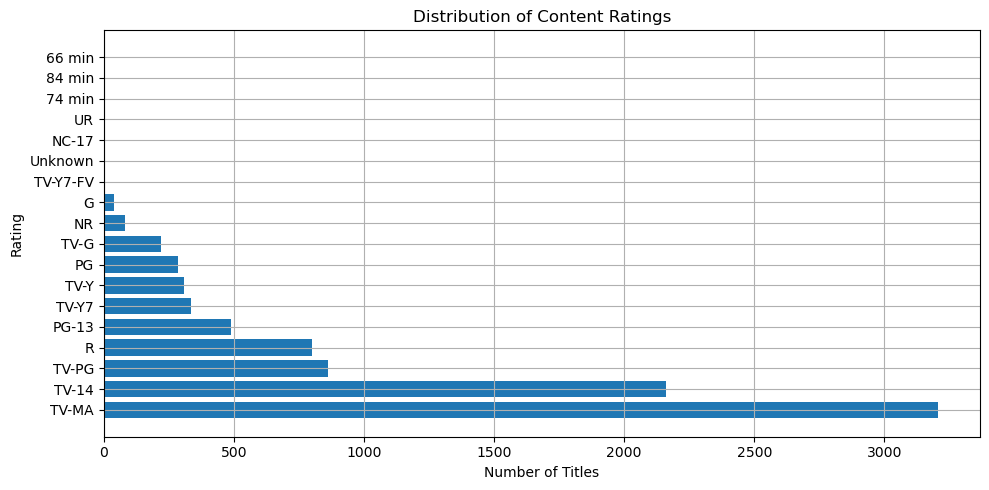

In [9]:
# Overall distribution
rating_counts = df['rating'].value_counts()
display(rating_counts.to_frame(name='count').head(15))

fig, ax = plt.subplots()
ax.barh(rating_counts.index, rating_counts.values)
ax.set_title('Distribution of Content Ratings')
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

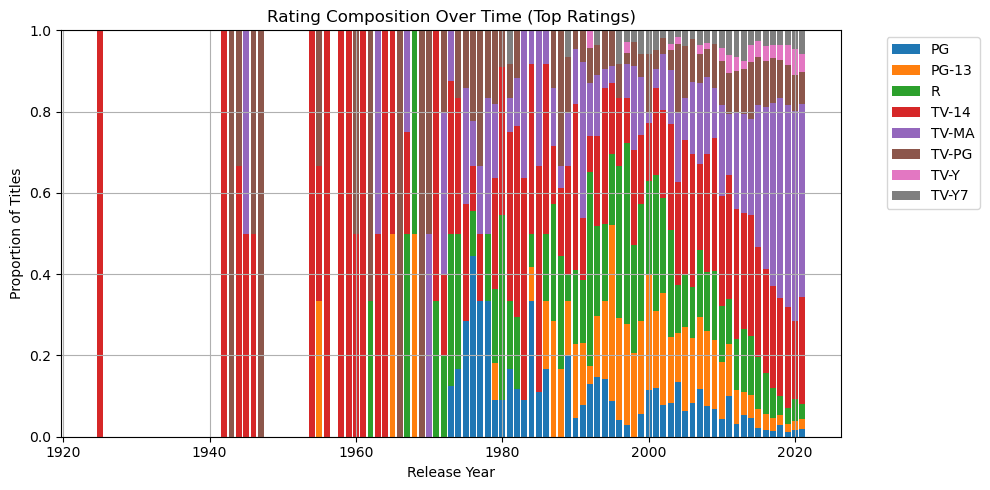

In [10]:
# Ratings by release year (stacked proportions for top ratings)
top_ratings = rating_counts.head(8).index.tolist()
ratings_year = (
    df[df['rating'].isin(top_ratings)]
      .groupby(['release_year', 'rating']).size()
      .unstack(fill_value=0)
)

# Convert to proportions to compare across years
ratings_prop = ratings_year.div(ratings_year.sum(axis=1), axis=0)

fig, ax = plt.subplots()
bottom = None
for i, col in enumerate(ratings_prop.columns):
    values = ratings_prop[col].values
    if bottom is None:
        ax.bar(ratings_prop.index, values, label=col)
        bottom = values
    else:
        ax.bar(ratings_prop.index, values, bottom=bottom, label=col)
        bottom = bottom + values
ax.set_title('Rating Composition Over Time (Top Ratings)')
ax.set_xlabel('Release Year')
ax.set_ylabel('Proportion of Titles')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:** Titles rated **TV‑MA**, **TV‑14**, and **TV‑PG** dominate the catalog, reflecting a focus on mature and general audiences. Children‑focused categories (e.g., **TV‑Y**, **TV‑Y7**) are smaller. Rating composition shifts slightly over time with the growth of originals.

## 7) Countries — Top Producers and Diversity
**Question:** Which countries contribute the most titles?

country
United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: count, dtype: int64

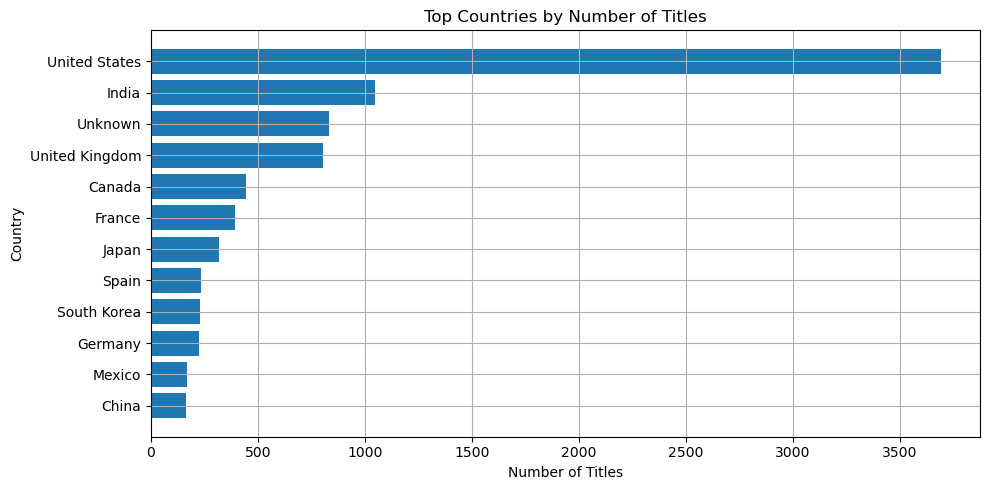

In [11]:
# Split multi-country rows and count
countries = df['country'].str.split(',').explode().str.strip()
country_counts = countries.value_counts()
display(country_counts.head(20))

top = country_counts.head(12)
fig, ax = plt.subplots()
ax.barh(top.index[::-1], top.values[::-1])
ax.set_title('Top Countries by Number of Titles')
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Country')
plt.tight_layout()
plt.show()

**Insight:** The **United States** and **India** typically lead, followed by the **United Kingdom**, **Japan**, and **South Korea**. This confirms increasing international diversification in Netflix's catalog.

## 8) Genres — Popularity and Trends
**Question:** Which genres dominate and how have they trended over time?

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64

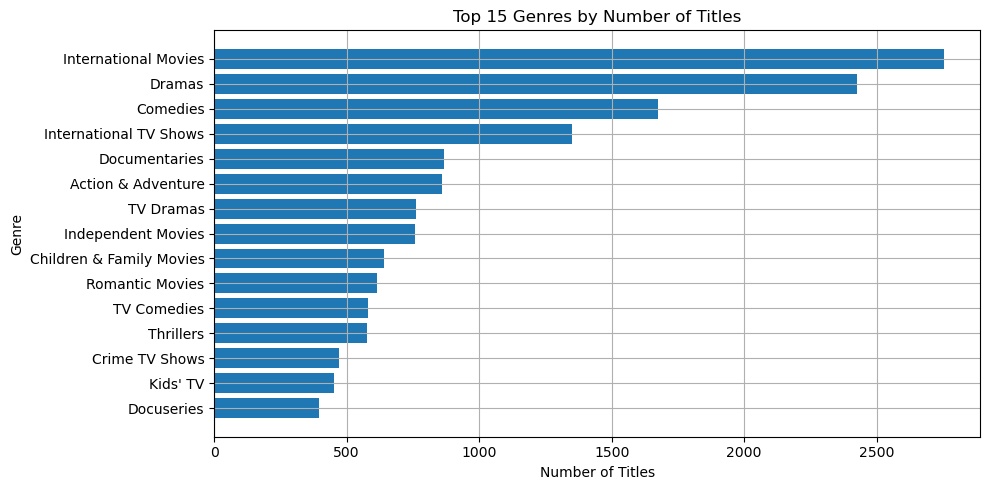

In [12]:
# Expand genre list
df_genres = (
    df.assign(genre=df['listed_in'].str.split(','))
      .explode('genre')
      .assign(genre=lambda d: d['genre'].str.strip())
)

genre_counts = df_genres['genre'].value_counts()
display(genre_counts.head(20))

# Bar chart of top 15 genres
topg = genre_counts.head(15)
fig, ax = plt.subplots()
ax.barh(topg.index[::-1], topg.values[::-1])
ax.set_title('Top 15 Genres by Number of Titles')
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Genre')
plt.tight_layout()
plt.show()

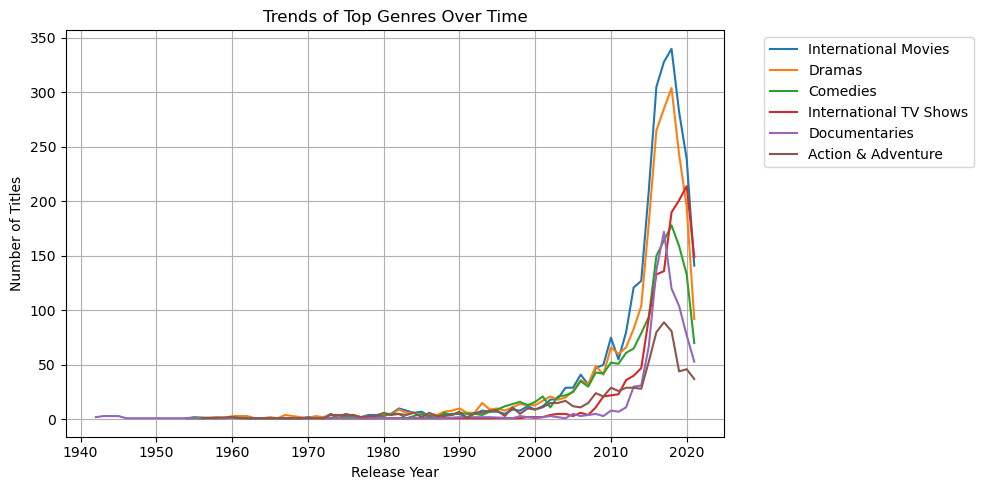

In [13]:
# Genre trends over time for the top 6 genres
top6 = genre_counts.head(6).index
trend = (
    df_genres[df_genres['genre'].isin(top6)]
      .groupby(['release_year', 'genre']).size()
      .reset_index(name='count')
)

fig, ax = plt.subplots()
for g in top6:
    sub = trend[trend['genre'] == g]
    ax.plot(sub['release_year'], sub['count'], label=g)
ax.set_title('Trends of Top Genres Over Time')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:** **Drama** and **Comedy** remain consistently strong. **International Movies/TV** and **Documentaries** have grown notably since mid‑2010s, aligned with Netflix's global expansion and content localization.

## 9) Duration Patterns — Movies and TV Shows
**Question:** How long are movies, and how many seasons do TV shows typically have?

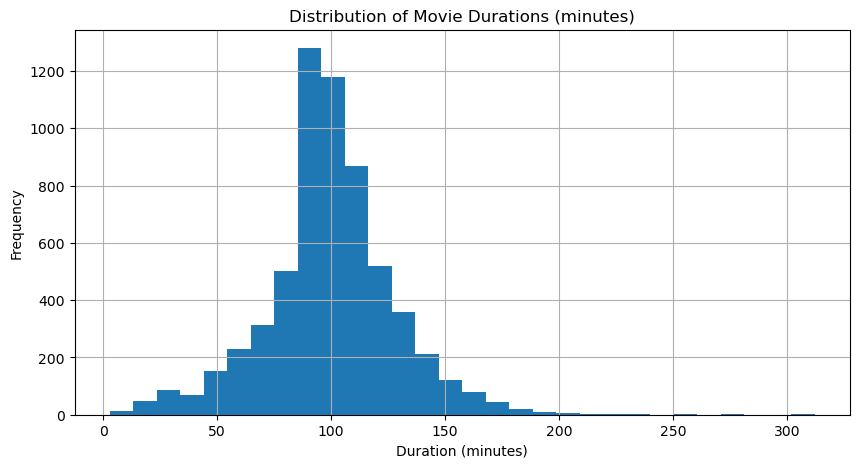

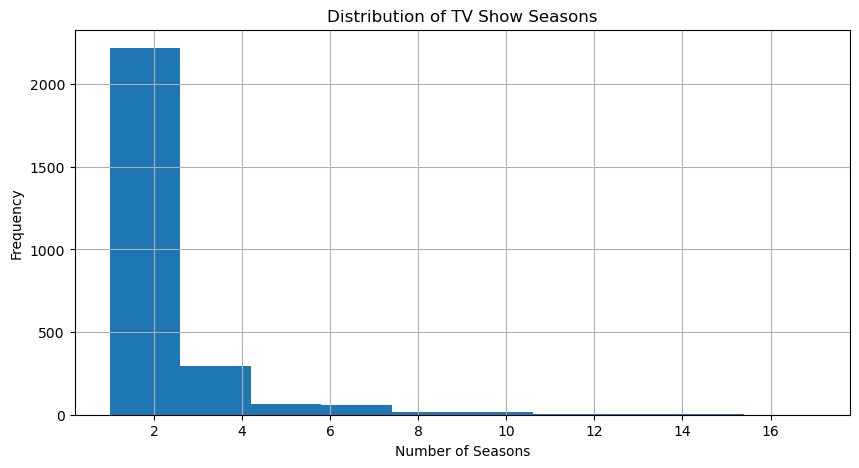

In [14]:
# Movies: convert 'duration' to minutes (numeric)
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = pd.to_numeric(
    df_movies['duration'].str.replace(' min', '', regex=False), errors='coerce'
)

fig, ax = plt.subplots()
ax.hist(df_movies['duration_min'].dropna(), bins=30)
ax.set_title('Distribution of Movie Durations (minutes)')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Frequency')
plt.show()

# TV Shows: extract number of seasons
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['seasons'] = pd.to_numeric(df_shows['duration'].str.extract(r'(\d+)')[0], errors='coerce')

fig, ax = plt.subplots()
ax.hist(df_shows['seasons'].dropna(), bins=10)
ax.set_title('Distribution of TV Show Seasons')
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Frequency')
plt.show()

**Insights:** Most movies cluster around **90–120 minutes**. Most series have **1–2 seasons**, indicating a prevalence of limited series or shorter productions.

## 10) Cross‑Cuts and Bonus Analysis
- **Top genres by content type** (e.g., are certain genres more common in Movies vs TV Shows?).
- **Country × Rating** heatmap to explore audience targeting by region.
- **Release year × Rating** composition to see audience focus over time.

type,Movie,TV Show
genre,,
International Movies,2752,0
Dramas,2427,0
Comedies,1674,0
Documentaries,869,0
Action & Adventure,859,0
Independent Movies,756,0
Children & Family Movies,641,0
Romantic Movies,616,0
Thrillers,577,0


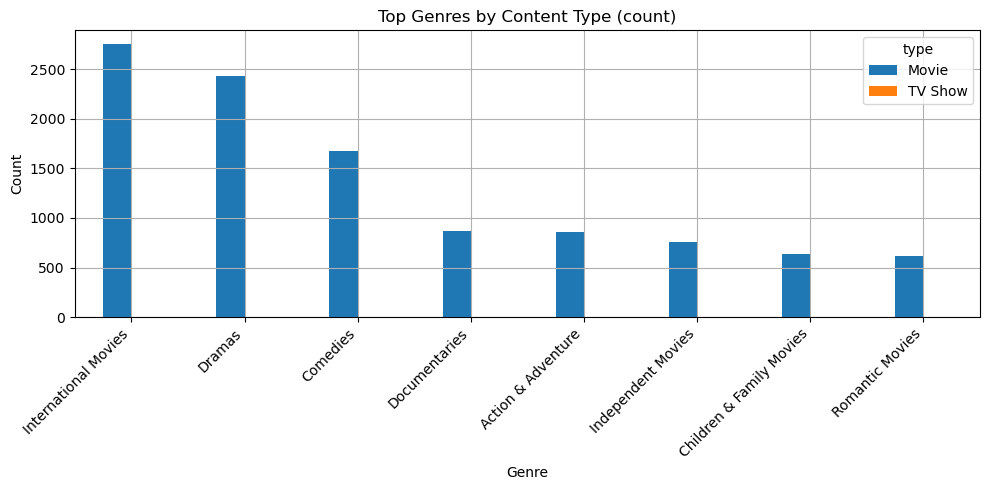

In [15]:
# Top genres for Movies vs TV Shows
cross = (
    df.assign(genre=df['listed_in'].str.split(','))
      .explode('genre')
      .assign(genre=lambda d: d['genre'].str.strip())
      .pivot_table(index='genre', columns='type', values='show_id', aggfunc='count', fill_value=0)
      .sort_values(by=['Movie','TV Show'], ascending=False)
)
display(cross.head(12))

fig, ax = plt.subplots()
cross.head(8).plot(kind='bar', ax=ax)
ax.set_title('Top Genres by Content Type (count)')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

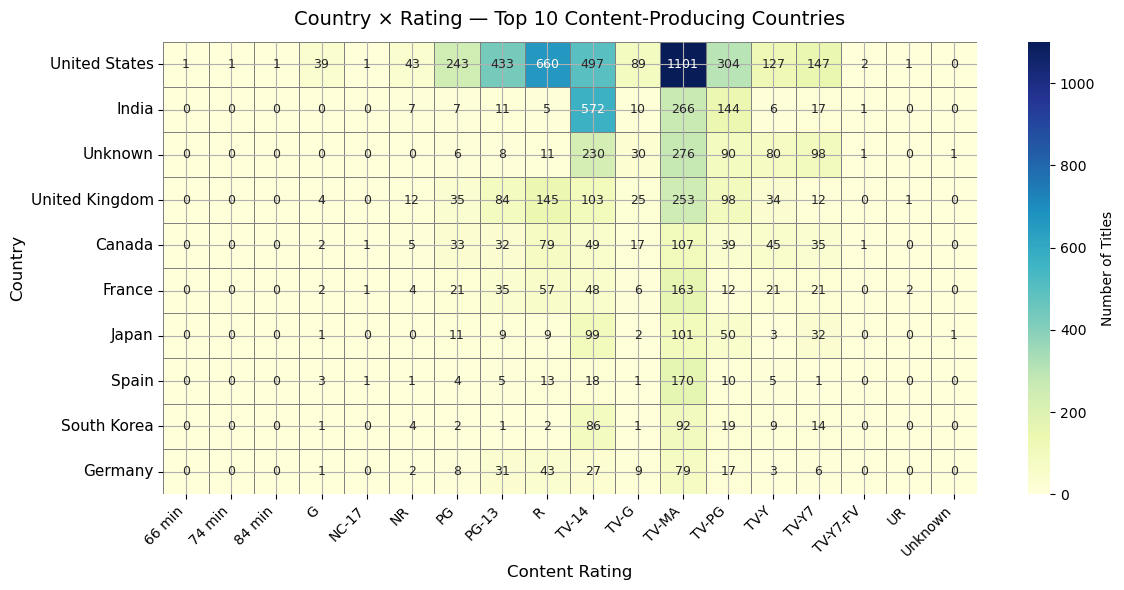

In [17]:
# Country × Rating (top 10 countries only)
# --- Clean up country data ---
countries = (
    df['country']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

# Get the actual top 10 individual countries
top10 = countries.value_counts().head(10).index.tolist()

# Filter dataframe to only include those top 10
df_top = df[df['country'].str.contains('|'.join(top10), regex=True, na=False)].copy()

# Expand multi-country entries again for accuracy
cr_exp = df_top.assign(country=df_top['country'].str.split(',')).explode('country')
cr_exp['country'] = cr_exp['country'].str.strip()

# Keep only the top 10 countries
cr_exp = cr_exp[cr_exp['country'].isin(top10)]

# Create pivot table
cr_pivot = cr_exp.pivot_table(
    index='country',
    columns='rating',
    values='show_id',
    aggfunc='count',
    fill_value=0
)

# Sort by total titles
cr_pivot = cr_pivot.loc[cr_pivot.sum(axis=1).sort_values(ascending=False).index]

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.heatmap(
    cr_pivot,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Titles'},
    annot=True,
    fmt='d',
    annot_kws={'size': 9}
)

plt.title('Country × Rating — Top 10 Content-Producing Countries', fontsize=14, pad=12)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


**Insights:** Certain regions skew toward general‑audience ratings while others show a higher share of mature ratings, reflecting regional content strategies.

## 11) Executive Summary (Key Findings)
1. **Catalog Mix:** Movies dominate overall; TV shows have grown rapidly since mid‑2010s.
2. **Release Momentum:** Strong acceleration post‑2015 in line with global expansion and originals.
3. **Audience Targeting:** TV‑MA and TV‑14 lead ratings; kids categories are smaller in share.
4. **Geographic Diversity:** U.S. and India lead; the U.K., Japan, and South Korea are significant contributors.
5. **Genres:** Drama, Comedy, and International content are top; Documentaries have expanded notably.
6. **Duration:** Movies cluster at ~90–120 minutes; TV shows most often run 1–2 seasons.
7. **Strategic Signal:** Growth in international and documentary content indicates diversification and localization.